In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [356]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### 1.Data Preprocessing:
## We loaded the data and firstly look at the overall data to judge whether there are missing values, and we will also gain a general impression and understanding of the data columns.

In [357]:
df=pd.read_csv('/Users/dylanbai/Desktop/Data Science2/Customer_Data.csv')

In [358]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [360]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)
df.dropna(subset=['MINIMUM_PAYMENTS'], inplace=True)


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [362]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## the column 'CUST_ID' is the customer's unique ID and doesn't make much sense to the overall data and model，so we can drop it.

In [363]:
df.drop('CUST_ID', axis=1, inplace=True)

## next，we looked into the outliers and decided whether we can drop it.

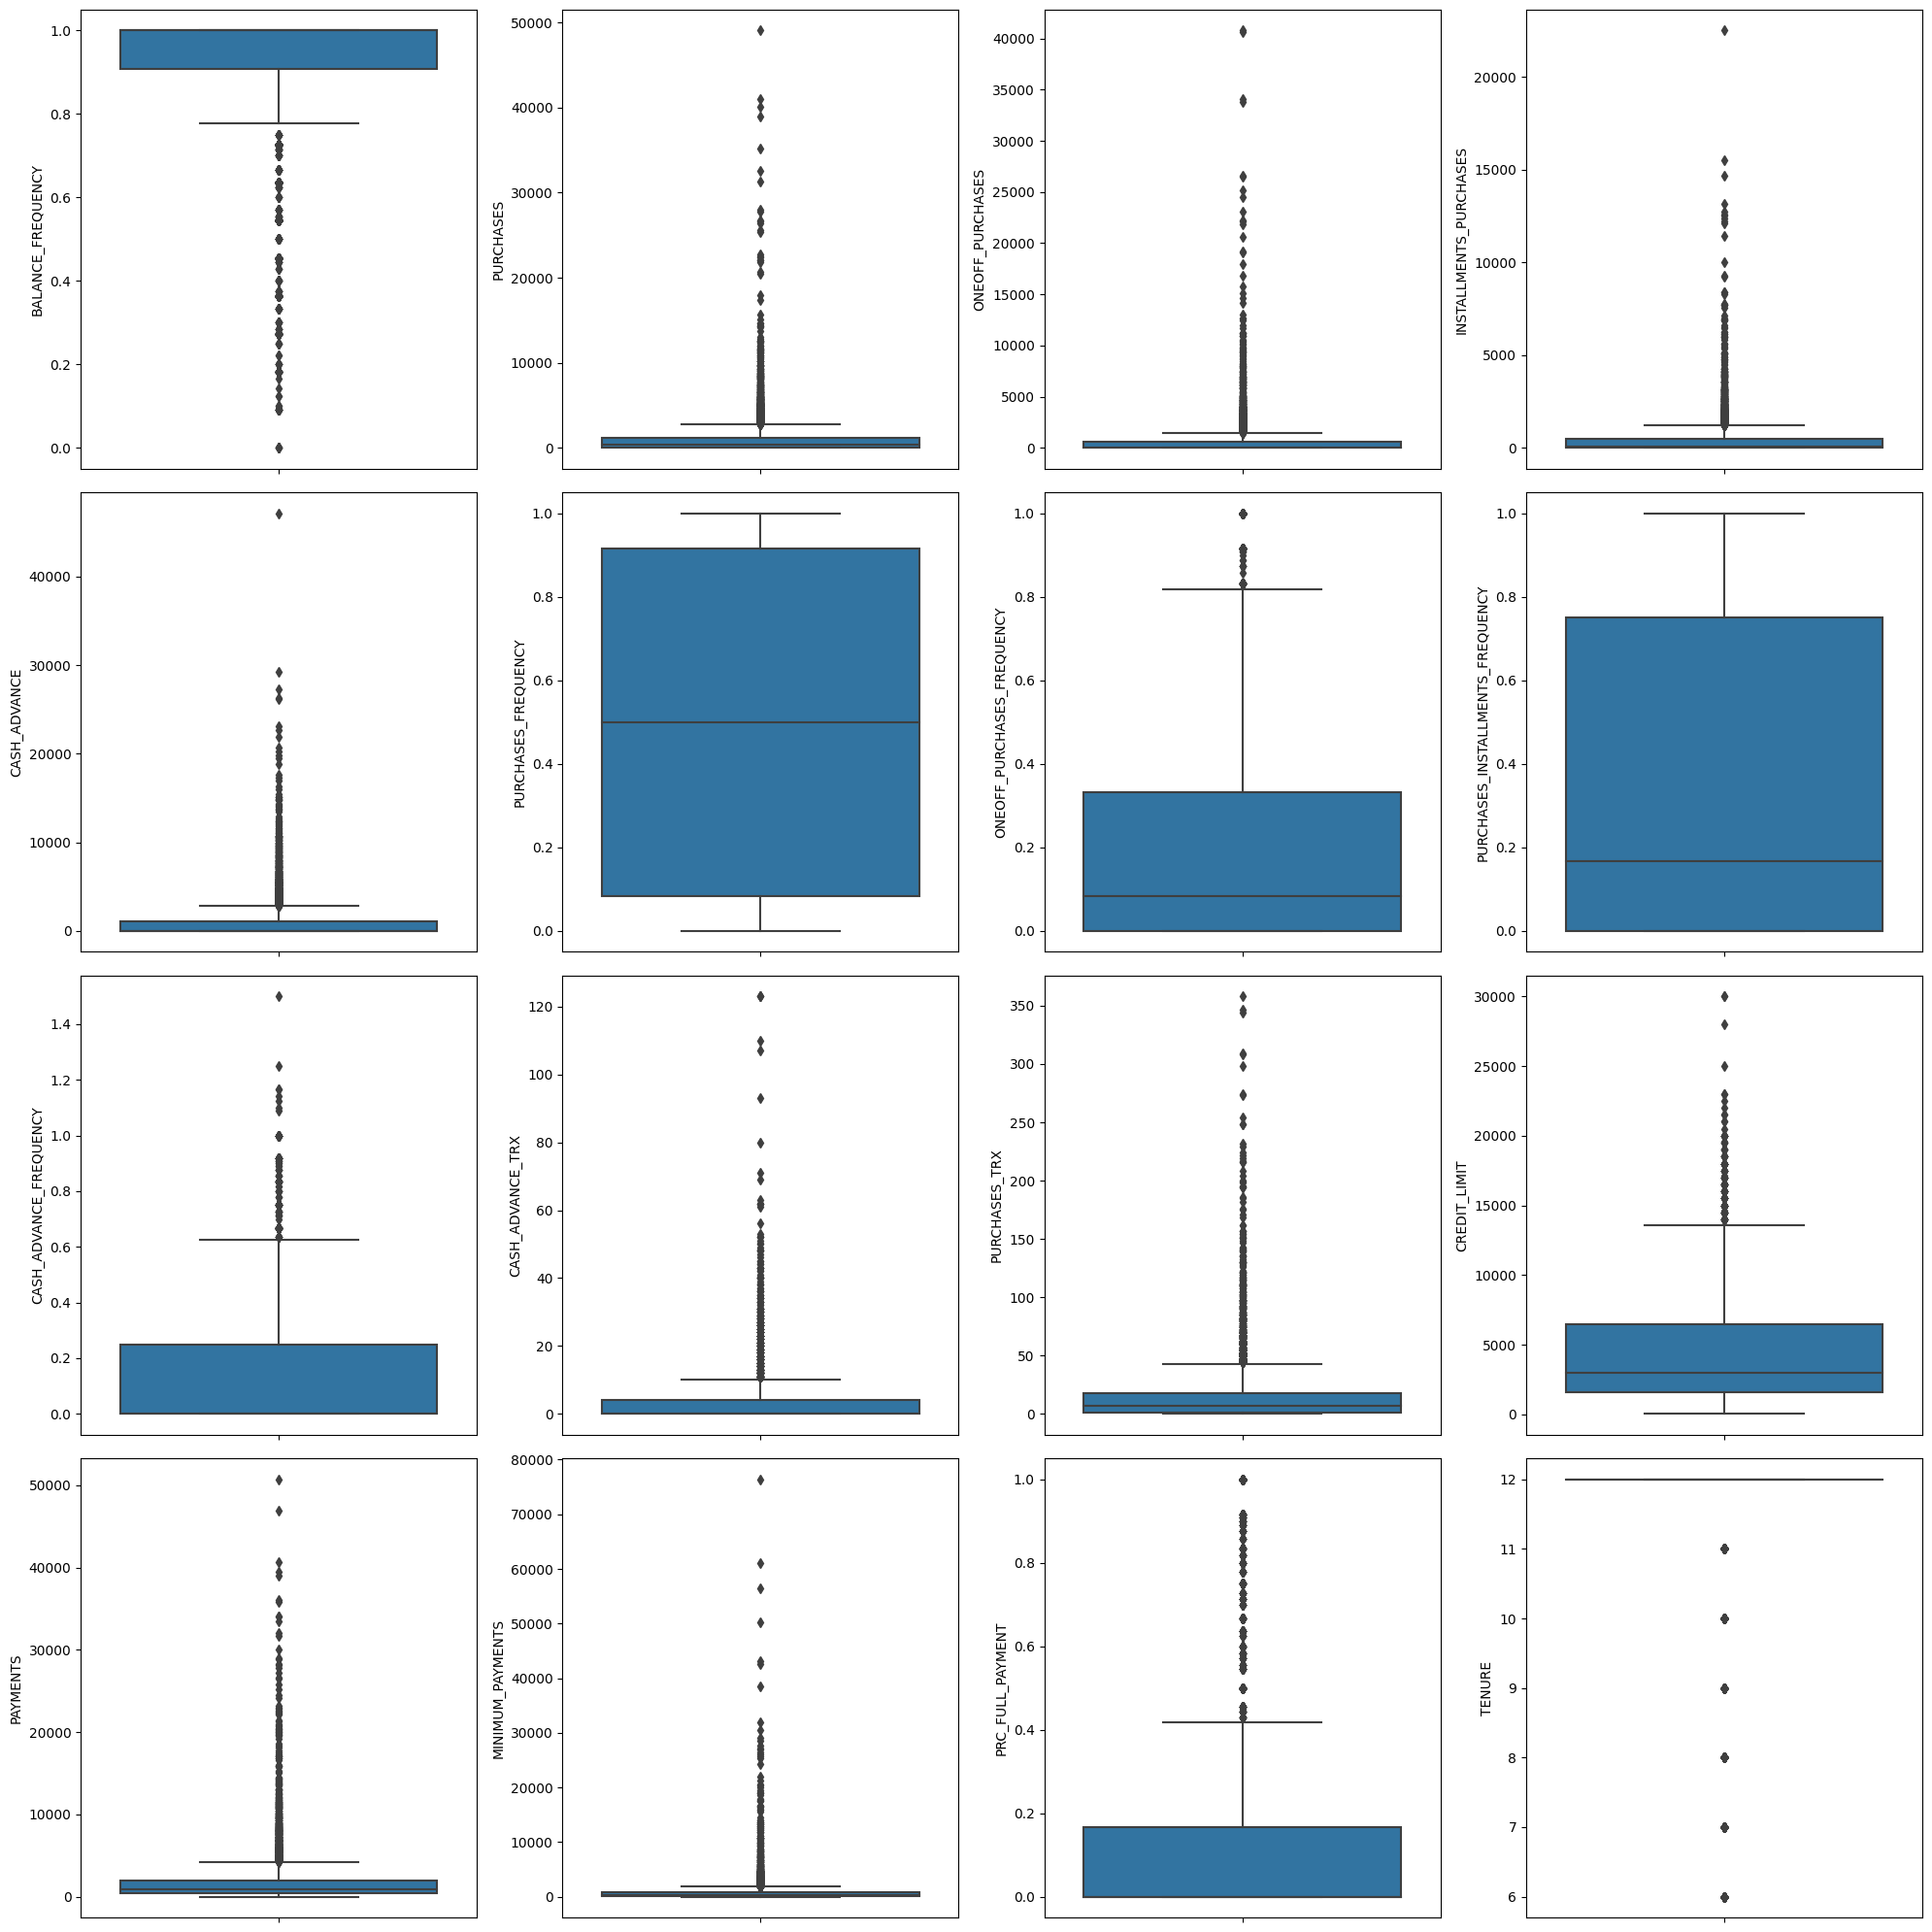

In [364]:
# Check outliers: numeric features
import seaborn as sns
# Create a 4x4 grid of subplots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, figsize=(20, 20))

# Plot each boxplot
sns.boxplot(y='BALANCE_FREQUENCY', ax=ax1, data=df)
sns.boxplot(y='PURCHASES', ax=ax2, data=df)
sns.boxplot(y='ONEOFF_PURCHASES', ax=ax3, data=df)
sns.boxplot(y='INSTALLMENTS_PURCHASES', ax=ax4, data=df)
sns.boxplot(y='CASH_ADVANCE', ax=ax5, data=df)
sns.boxplot(y='PURCHASES_FREQUENCY', ax=ax6, data=df)
sns.boxplot(y='ONEOFF_PURCHASES_FREQUENCY', ax=ax7, data=df)
sns.boxplot(y='PURCHASES_INSTALLMENTS_FREQUENCY', ax=ax8, data=df)
sns.boxplot(y='CASH_ADVANCE_FREQUENCY', ax=ax9, data=df)
sns.boxplot(y='CASH_ADVANCE_TRX', ax=ax10, data=df)
sns.boxplot(y='PURCHASES_TRX', ax=ax11, data=df)
sns.boxplot(y='CREDIT_LIMIT', ax=ax12, data=df)
sns.boxplot(y='PAYMENTS', ax=ax13, data=df)
sns.boxplot(y='MINIMUM_PAYMENTS', ax=ax14, data=df)
sns.boxplot(y='PRC_FULL_PAYMENT', ax=ax15, data=df)
sns.boxplot(y='TENURE', ax=ax16, data=df)

# Optionally, adjust the layout
plt.tight_layout()
plt.show()

In [365]:
#drop the outliers
PURCHASES_outliers=df[df['PURCHASES']>20000].index
df.drop(PURCHASES_outliers,inplace=True)

ONEOFF_PURCHASES_outliers=df[df['ONEOFF_PURCHASES']>20000].index
df.drop(ONEOFF_PURCHASES_outliers,inplace=True)

INSTALLMENTS_PURCHASES_outliers=df[df['INSTALLMENTS_PURCHASES']>10000].index
df.drop(INSTALLMENTS_PURCHASES_outliers,inplace=True)

CASH_ADVANCE_outliers=df[df['CASH_ADVANCE']>20000].index
df.drop(CASH_ADVANCE_outliers,inplace=True)

CREDIT_LIMIT_outliers=df[df['CREDIT_LIMIT']>20000].index
df.drop(CREDIT_LIMIT_outliers,inplace=True)

PAYMENTS_outliers=df[df['PAYMENTS']>30000].index
df.drop(PAYMENTS_outliers,inplace=True)

MINIMUM_PAYMENTS_outliers=df[df['MINIMUM_PAYMENTS']>30000].index
df.drop(MINIMUM_PAYMENTS_outliers,inplace=True)


## The features of the dataset exhibit high correlation (multicollinearity) and our dataset has a high number of dimensions (meaning a large number of features)，so we should apply the PCA，which can ssist in reducing dimensionality, speeding up model training and mitigating the effects of collinearity.

In [372]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [373]:
from sklearn.decomposition import PCA

# Specify the number of components you want to retain
n_components = 2 

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_df)

In [374]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.27886383 0.20698823]


In [375]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

In [377]:
X = np.array(pca_df)

In [378]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

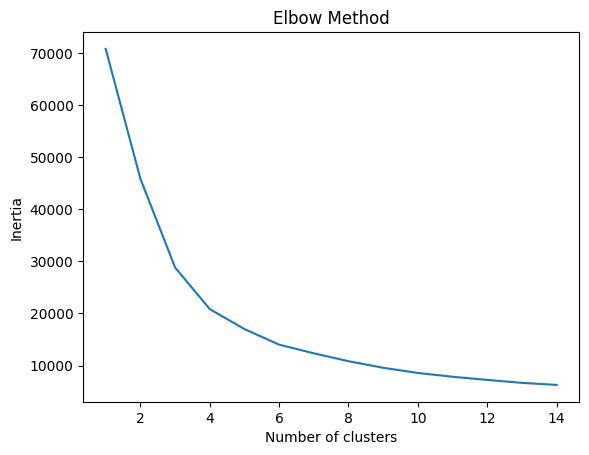

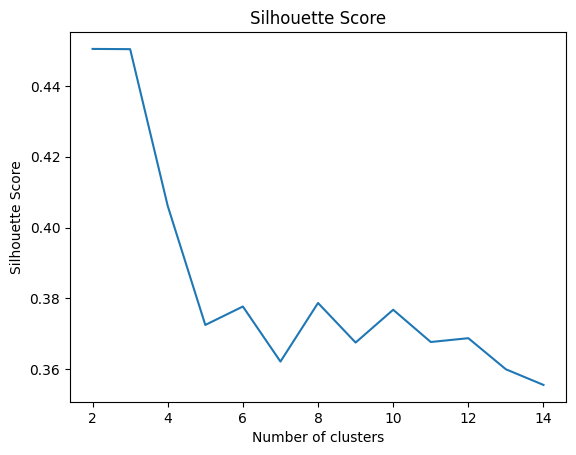

Silhouette Score: 0.35557102132849977


In [379]:
inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(X, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

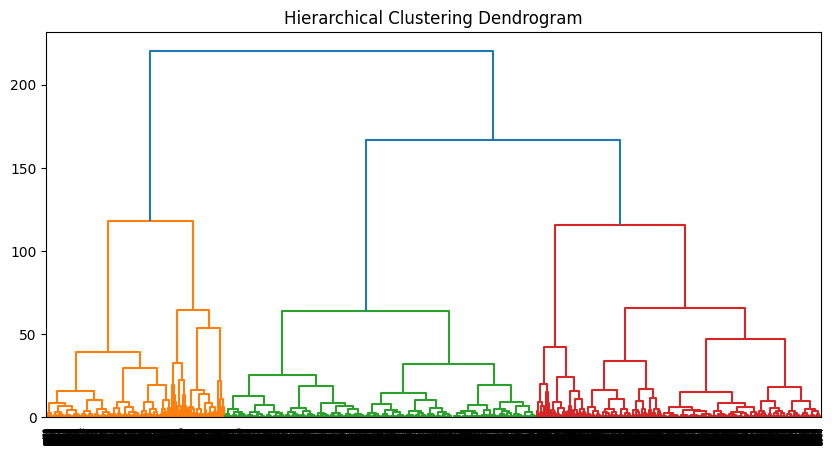

In [380]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Affinity Propagation Silhouette Score: 0.13694103451994138


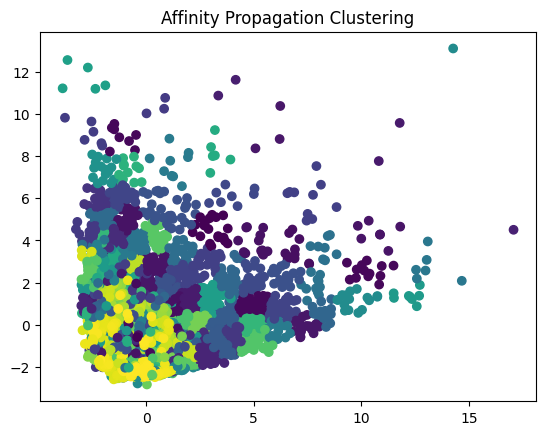

In [381]:
# Importing required library
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(X)

# Silhouette Score
af_sil_score = silhouette_score(X, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()

DBSCAN Silhouette Score: 0.40153283035620296


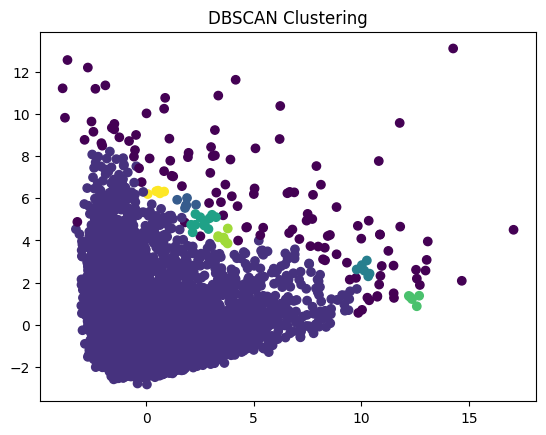

In [382]:
# Importing required library
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

In [383]:
##num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#print("Number of clusters found:", num_clusters)

In [384]:
from collections import Counter

dbscan = DBSCAN()
cluster_labels = dbscan.fit_predict(X)

# Count the number of samples in each cluster
cluster_counts = Counter(cluster_labels)

# Print the cluster labels and their respective sample counts
for label, count in cluster_counts.items():
    if label == -1:
        print(f"Cluster: Noise, Count: {count}")
    else:
        print(f"Cluster {label}, Count: {count}")

Cluster 0, Count: 8420
Cluster 3, Count: 11
Cluster: Noise, Count: 115
Cluster 1, Count: 6
Cluster 2, Count: 6
Cluster 4, Count: 5
Cluster 6, Count: 5
Cluster 5, Count: 7
